<a href="https://colab.research.google.com/github/guard1000/NLP_MCC/blob/master/4_LSTM_MLP_CNN_RCNN_Draft_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

환경: 구글 Colab

데이터: 크롤러로 긁은 네이버 뉴스 2019.01 ~ 2019.04
-- 7만개 좀 넘는데 미니 데이터로 1만개만 사용



[Contents]
0. 데이터 수집
1. 형태소 분석
2. Tokenizer로 인코딩
3. 희소 단어 배제
4. 불필요 행 제거
5. 기사 길이 분포 확인 및 적정 길이로 패딩
6. 모델 제작 - LSTM, MLP, CNN, RCNN
7. Test


[결론]

생각보다 별로네...

전처리를 잘 해보자

다시 해보기.

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 234kB/s 
     |████████████████████████████████| 92kB 10.4MB/s 
     |████████████████████████████████| 2.4MB 36.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [2]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re

In [4]:
# 수집해둔 데이터 불러오기.
# 수집과정은 ~~~~~~~~~ 참고.
df = pd.read_csv("/content/drive/My Drive/data/Article_shuffled.csv")
df.head()

,이해찬 민주당 단배식서 내년 총선 압승해 민주주의 정착 새해 첫날인 1일 여권은 집권 3년 차를 맞은 문재인 정부의 성공을 기원하며 내부 결속 의지를 다졌다. 특히 여당인 더불어민주당은 2020년 총선 압승 을 발판으로 2022년 정권 재창출 을 이뤄내겠다고 다짐했다. 문희상 국회의장은 이날 서울 한남동 의장 공관에서 신년 기자간담회를 열고 집권 3년 차는 아주 중요한 전기 라고 했다. 그러면서 올해를 황금돼지해라고 부르는데 저는 검은 돼지든 흰 돼지든 무게만 나가면 된다고 생각한다 며 흑돈백돈 黑豚白豚 론 을 펼쳤다. 중국 덩샤오핑의 흑묘백묘론 검은 고양이든 흰 고양이든 쥐만 잘 잡으면 된다 을 차용해 올해 경제 발전이 가장 중요한 과제라는 점을 강조한 것으로 해석됐다. 문 의장은 황금으로 누런 돼지라고 하면 이건 정말 대박 이라며 번영의 돼지해에 문재인 정부도 성공하고 우리도 성공하는 한 해가 되길 바란다 고 했다. 민주당은 이날 여의도 당사에서 신년인사회를 겸한 단배식을 열었다. 이해찬 대표는 재작년에는 정권 교체를 이뤘고 작년에는 지방선거에서 민주당이 압도적 승리를 거뒀다 며 이것을 기반으로 내년 총선에서 아주 크게 압승하는 정치적 성과를 올려야 한다 고 했다. 이 대표는 총선에서 크게 이기는 게 이 나라 민주주의를 정착시키는 데 아주 중요한 과업 이라며 그래야 2022년 대선에서 정권을 재창출해 민주당이 평화와 민주주의를 지키는 마지막 보루가 될 수 있다 고 했다. 이 대표는 남북 관계와 관련해 지난해 70년 분단 체제에서 평화 체제로 전환되는 역사적 한 획을 그었다 며 아마 남북 정상회담이 올해 일찍 열릴 가능성이 크다 고 했다. 경제 문제에 대해선 어렵다곤 하지만 조금씩은 나아지고 있다 고 했다. 그러자 홍영표 원내대표는 맞바람을 향해 돛을 펼친다 는 역풍장범 逆風張帆 이라는 말이 있다 며 앞으로도 많은 시련과 도전이 기다리고 있다. 이 대표를 중심으로 더욱 단결하는 한 해가 되도록 하자 고 했다. 민주당 지도부는 이날 오전 서울 국립현충원에서 김영삼·김대중 전 대통령 묘역을 참배했다. 이어 이승만·박정희 전 대통령 묘역도 찾았으나 일부 시민이 어떻게 박 전 대통령 묘역에 인사할 수 있나. 부끄럽지도 않으냐 고 항의해 분위기가 일순간 얼어붙기도 했다. 오후에는 경남 김해 봉하마을을 방문해 노무현 전 대통령 묘역을 참배했다.,정치
0,지난해 서울 아파트값이 2006년 이후 가장 큰 폭으로 상승했습니다. 2일 한국감정...,경제
1,의왕 연합뉴스 김인유 기자 경기 의왕시는 경로당 어르신들의 건강을 전문적으로 돌보는...,생활문화
2,한민수 기자 이번에 샌프란시스코에서 선언할 것은 직접판매 체계의 구축입니다. 지난해...,IT과학
3,JTBC ‘2019년 한국 어디로 가나’ 신년 토론. 사진 JTBC 방송화면 캡처 ...,정치
4,고려대 온라인 커뮤니티 고파스에 올라온 손혜원 더불어민주당 의원에 18원의 후원금을...,정치


In [10]:
df.iloc[0]

이해찬 민주당 단배식서 내년 총선 압승해 민주주의 정착 새해 첫날인 1일 여권은 집권 3년 차를 맞은 문재인 정부의 성공을 기원하며 내부 결속 의지를 다졌다. 특히 여당인 더불어민주당은 2020년 총선 압승 을 발판으로 2022년 정권 재창출 을 이뤄내겠다고 다짐했다. 문희상 국회의장은 이날 서울 한남동 의장 공관에서 신년 기자간담회를 열고 집권 3년 차는 아주 중요한 전기 라고 했다. 그러면서 올해를 황금돼지해라고 부르는데 저는 검은 돼지든 흰 돼지든 무게만 나가면 된다고 생각한다 며 흑돈백돈 黑豚白豚 론 을 펼쳤다. 중국 덩샤오핑의 흑묘백묘론 검은 고양이든 흰 고양이든 쥐만 잘 잡으면 된다 을 차용해 올해 경제 발전이 가장 중요한 과제라는 점을 강조한 것으로 해석됐다. 문 의장은 황금으로 누런 돼지라고 하면 이건 정말 대박 이라며 번영의 돼지해에 문재인 정부도 성공하고 우리도 성공하는 한 해가 되길 바란다 고 했다. 민주당은 이날 여의도 당사에서 신년인사회를 겸한 단배식을 열었다. 이해찬 대표는 재작년에는 정권 교체를 이뤘고 작년에는 지방선거에서 민주당이 압도적 승리를 거뒀다 며 이것을 기반으로 내년 총선에서 아주 크게 압승하는 정치적 성과를 올려야 한다 고 했다. 이 대표는 총선에서 크게 이기는 게 이 나라 민주주의를 정착시키는 데 아주 중요한 과업 이라며 그래야 2022년 대선에서 정권을 재창출해 민주당이 평화와 민주주의를 지키는 마지막 보루가 될 수 있다 고 했다. 이 대표는 남북 관계와 관련해 지난해 70년 분단 체제에서 평화 체제로 전환되는 역사적 한 획을 그었다 며 아마 남북 정상회담이 올해 일찍 열릴 가능성이 크다 고 했다. 경제 문제에 대해선 어렵다곤 하지만 조금씩은 나아지고 있다 고 했다. 그러자 홍영표 원내대표는 맞바람을 향해 돛을 펼친다 는 역풍장범 逆風張帆 이라는 말이 있다 며 앞으로도 많은 시련과 도전이 기다리고 있다. 이 대표를 중심으로 더욱 단결하는 한 해가 되도록 하자 고 했다. 민주당 지도부는 이날 오전 서울 국립현충원에서 김

In [11]:
# Column 명 바꿔주기
df.rename(columns={'이해찬 민주당 단배식서 내년 총선 압승해 민주주의 정착 새해 첫날인 1일 여권은 집권 3년 차를 맞은 문재인 정부의 성공을 기원하며 내부 결속 의지를 다졌다. 특히 여당인 더불어민주당은 2020년 총선 압승 을 발판으로 2022년 정권 재창출 을 이뤄내겠다고 다짐했다. 문희상 국회의장은 이날 서울 한남동 의장 공관에서 신년 기자간담회를 열고 집권 3년 차는 아주 중요한 전기 라고 했다. 그러면서 올해를 황금돼지해라고 부르는데 저는 검은 돼지든 흰 돼지든 무게만 나가면 된다고 생각한다 며 흑돈백돈 黑豚白豚 론 을 펼쳤다. 중국 덩샤오핑의 흑묘백묘론 검은 고양이든 흰 고양이든 쥐만 잘 잡으면 된다 을 차용해 올해 경제 발전이 가장 중요한 과제라는 점을 강조한 것으로 해석됐다. 문 의장은 황금으로 누런 돼지라고 하면 이건 정말 대박 이라며 번영의 돼지해에 문재인 정부도 성공하고 우리도 성공하는 한 해가 되길 바란다 고 했다. 민주당은 이날 여의도 당사에서 신년인사회를 겸한 단배식을 열었다. 이해찬 대표는 재작년에는 정권 교체를 이뤘고 작년에는 지방선거에서 민주당이 압도적 승리를 거뒀다 며 이것을 기반으로 내년 총선에서 아주 크게 압승하는 정치적 성과를 올려야 한다 고 했다. 이 대표는 총선에서 크게 이기는 게 이 나라 민주주의를 정착시키는 데 아주 중요한 과업 이라며 그래야 2022년 대선에서 정권을 재창출해 민주당이 평화와 민주주의를 지키는 마지막 보루가 될 수 있다 고 했다. 이 대표는 남북 관계와 관련해 지난해 70년 분단 체제에서 평화 체제로 전환되는 역사적 한 획을 그었다 며 아마 남북 정상회담이 올해 일찍 열릴 가능성이 크다 고 했다. 경제 문제에 대해선 어렵다곤 하지만 조금씩은 나아지고 있다 고 했다. 그러자 홍영표 원내대표는 맞바람을 향해 돛을 펼친다 는 역풍장범 逆風張帆 이라는 말이 있다 며 앞으로도 많은 시련과 도전이 기다리고 있다. 이 대표를 중심으로 더욱 단결하는 한 해가 되도록 하자 고 했다. 민주당 지도부는 이날 오전 서울 국립현충원에서 김영삼·김대중 전 대통령 묘역을 참배했다. 이어 이승만·박정희 전 대통령 묘역도 찾았으나 일부 시민이 어떻게 박 전 대통령 묘역에 인사할 수 있나. 부끄럽지도 않으냐 고 항의해 분위기가 일순간 얼어붙기도 했다. 오후에는 경남 김해 봉하마을을 방문해 노무현 전 대통령 묘역을 참배했다.' : 'Query', '정치': 'GT'}, inplace=True)

# 10000개만 띠어내서 train_data 생성
train_data = df.iloc[:10000]
print(train_data.shape)

# 1000개로 테스트 데이터
test_data = df.iloc[10000:11000]
print(test_data.shape)

display(train_data.head())
display(test_data.head())

(10000, 2)
(1000, 2)


,Query,GT
0,지난해 서울 아파트값이 2006년 이후 가장 큰 폭으로 상승했습니다. 2일 한국감정...,경제
1,의왕 연합뉴스 김인유 기자 경기 의왕시는 경로당 어르신들의 건강을 전문적으로 돌보는...,생활문화
2,한민수 기자 이번에 샌프란시스코에서 선언할 것은 직접판매 체계의 구축입니다. 지난해...,IT과학
3,JTBC ‘2019년 한국 어디로 가나’ 신년 토론. 사진 JTBC 방송화면 캡처 ...,정치
4,고려대 온라인 커뮤니티 고파스에 올라온 손혜원 더불어민주당 의원에 18원의 후원금을...,정치


,Query,GT
10000,내달 2일 남성약물 카르텔 규탄시위 주최측 인터뷰 약물 사고파는 이들뿐 아니라 방관...,오피니언
10001,서울 뉴시스 추상철 기자 상장폐지가 결정된경남제약의 소액주주모임이 2일 오전 서울 ...,사회
10002,조명균 통일부 장관 연합뉴스 자료사진 서울 연합뉴스 이상현 기자 조명균 통일부 장관...,사회
10003,이데일리 신태현 기자 김병준 자유한국당 비상대책위원장 나경원 원내대표 등이 2일 서...,정치
10004,김태년 더불어민주당 정책위의장 연합뉴스 김태년 더불어민주당 정책위의장은 3일 서울 ...,정치


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_

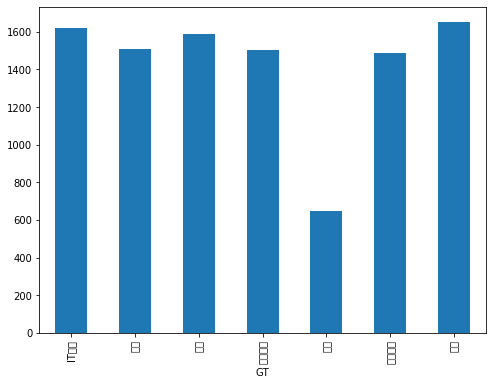

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,6))
train_data.groupby('GT').Query.count().plot.bar(ylim=0)

In [14]:
# 형태소 분석
okt = Okt()
stopwords = ['의','기자', '”', '“', '며','그', '가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

X_train = []
X_test = []

# X_train 10000개, X_test 1000개
for i in range(len(train_data) + len(test_data)):
  sentence = okt.pos(df.iloc[i].Query, norm=True, stem=True)
  temp = []
  temp_embedding = []
  all_temp = []
  for k in range(len(sentence)):
    temp_embedding.append(sentence[k][0])
    #if sentence[k][1] in ["Noun"]:  # 명사만 써보고 싶을땐 이거
    if sentence[k][1] not in ["Josa", "Eomi", "Punctuation", "Suffix"] and sentence[k][0] not in stopwords: 
      temp.append(sentence[k][0]) #+ '/' + sentence[k][1])
  all_temp.append(temp)

  if i < len(train_data):
    train_data.iloc[i].Query = ' '.join(all_temp[0])
    X_train.append(all_temp[0])
  else:
    test_data.iloc[i-len(train_data)].Query = ' '.join(all_temp[0])
    X_test.append(all_temp[0])

train_data.head()
test_data.head()

,Query,GT
10000,내달 2일 남성 약물 카르텔 규탄 시위 주최 인터뷰 약물 사고팔다 뿐 아니다 방관 ...,오피니언
10001,서울 뉴시스 추상 철 상장폐지 결정 되다 경남 제약 소액 주 주 모임 2일 오전 서...,사회
10002,조명 균 통일부 장관 연합뉴스 자료 사진 서울 연합뉴스 이상현 조명 균 통일부 장관...,사회
10003,이데일리 신 태현 김병준 자유 한국 비상 대책 위원장 나경원 원내대표 등 2일 서울...,정치
10004,김태년 더불다 민주당 정책 위 의장 연합뉴스 김태년 더불다 민주당 정책 위 의장 3...,정치


In [0]:
# 형태소로 나눠준 데이터 저장하고 싶다면!
train_data.to_csv("/content/drive/My Drive/data/train_data.csv", index = False)
test_data.to_csv("/content/drive/My Drive/data/test_data.csv", index = False)

In [21]:
# Tokenizer로 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
tokenizer.word_index

{'있다': 1,
 '되다': 2,
 '것': 3,
 '수': 4,
 '등': 5,
 '‘': 6,
 '이다': 7,
 '고': 8,
 '않다': 9,
 '전': 10,
 '돼다': 11,
 '없다': 12,
 '말': 13,
 '서울': 14,
 '1': 15,
 '한국': 16,
 '위': 17,
 '받다': 18,
 '정부': 19,
 '미국': 20,
 '대통령': 21,
 '아니다': 22,
 '보다': 23,
 '늘다': 24,
 '대한': 25,
 '사업': 26,
 '밝히다': 27,
 '통해': 28,
 '지난해': 29,
 '오다': 30,
 '가다': 31,
 '우리': 32,
 '위해': 33,
 '기업': 34,
 '경제': 35,
 '기술': 36,
 '제': 37,
 '다': 38,
 '더': 39,
 '2': 40,
 '3': 41,
 '시장': 42,
 '따르다': 43,
 '중': 44,
 '올해': 45,
 '내': 46,
 '대표': 47,
 '중국': 48,
 '때': 49,
 '같다': 50,
 '일': 51,
 '명': 52,
 '사람': 53,
 '크다': 54,
 '및': 55,
 '못': 56,
 '5': 57,
 '함께': 58,
 '만들다': 59,
 '개': 60,
 '북한': 61,
 '지역': 62,
 '문제': 63,
 '서비스': 64,
 '때문': 65,
 '많다': 66,
 '대해': 67,
 '사회': 68,
 '관련': 69,
 '세계': 70,
 '기': 71,
 '대': 72,
 '날': 73,
 '그렇다': 74,
 '새롭다': 75,
 '제공': 76,
 '정책': 77,
 '2일': 78,
 '로': 79,
 '새해': 80,
 '열리다': 81,
 '이번': 82,
 '나오다': 83,
 '김': 84,
 '산업': 85,
 '4': 86,
 '지난': 87,
 '이르다': 88,
 '또': 89,
 '시간': 90,
 '차': 91,
 '신': 92,
 '지원': 93,
 '점': 

In [22]:
#희귀단어 수 및 비율
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 66345
등장 빈도가 2번 이하인 희귀 단어의 수: 32741
단어 집합에서 희귀 단어의 비율: 49.349611877308014
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.6324770190703548


In [0]:
# 등장 횟수 2회 이하가 49%인데, 전체에서 보면 1.6%
# 사실상 처리하는데 큰 영향 없을듯...? 배제시키자.
# tokenizer가 부여한 인덱스가 숫자 커질수록 희소한 것임
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1

tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
# y_train과 y_test를 지정
y_train = np.array(train_data['GT'])
y_test = np.array(test_data['GT'])

In [62]:
#y_train과 y_test도 str -> float 꼴로 바꿔줌
dic_category = {'경제': 0, '생활문화': 1, 'IT과학': 2, '정치': 3, '사회': 4, '오피니언': 5, '세계':6}
for i in range(len(y_train)):
  y_train[i] = dic_category[y_train[i]]
for i in range(len(y_test)):
  y_test[i] = dic_category[y_test[i]]
y_test[-10:]

array([4, 4, 2, 4, 2, 3, 6, 5, 6, 3], dtype=object)

In [29]:
# 희소 데이터로만 이루어져있던 데이터셋은 빈 리스트 형태로 있을테니 이것도 없애주자.
# 단, 지금 데이터에서는 없어서 안해도 됨
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]
print(len(drop_train), len(drop_test)) # 빈 데이터 셋 갯수 출력

# 빈 데이터 셋([]) 제거 - 지금 데이터에선 제거 되는거 없음 ㅇㅇ
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))


0 0
10000
10000


뉴스 기사 최대 길이 : 4184
뉴스 기사 평균 길이 : 250.6494


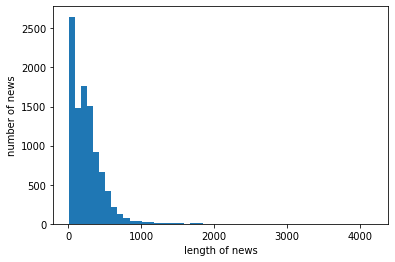

In [31]:
# 전체 데이터 중 가장 긴 뉴스, 뉴스들 평균  길이로 어느정도 길이로 잘라낼지 확인
print('뉴스 기사 최대 길이 :',max(len(l) for l in X_train))
print('뉴스 기사 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of news')
plt.ylabel('number of news')
plt.show()

In [46]:
#전체 데이터 중 특정 length 이하인 비율을 알려주는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 데이터 중 길이가 %s 이하인 데이터의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 800  # 위 그래프 보면서 임의로 값 넣어보면서 비율 확인
below_threshold_len(max_len, X_train)

# max len - 비율
#   1000  - 98.83
#    900  - 98.42
#    800  - 97.82
#    700  - 96.65
#    600  - 94.36

전체 데이터 중 길이가 800 이하인 데이터의 비율: 97.82


In [0]:
# 모든 데이터의 길이를 앞서 설정한 max_len으로 맞춰줌
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [0]:
############################################### 
############### 전처리 완료 ###################
############################################### 

In [0]:
# LSTM 구현 라이브러리 import
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
# 모델 제작 
model = Sequential()
model.add(Embedding(vocab_size, 128)) # 임의로 output_dim 128으로 설정
model.add(LSTM(128))
model.add(Dense(7, activation = 'softmax')) 

In [0]:
# validation_loss가 증가 -> overfitting의 징후이므로, 4회 이상 증가시 학습 조기 종료
# ModelCheckpoint로 val_acc이 전보다 좋아질 경우에만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [66]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/15
7936/8000 [============================>.] - ETA: 2s - loss: 1.6148 - acc: 0.3637
Epoch 00001: val_acc improved from -inf to 0.54150, saving model to best_model.h5
8000/8000 [==============================] - 337s 42ms/sample - loss: 1.6128 - acc: 0.3651 - val_loss: 1.2756 - val_acc: 0.5415
Epoch 2/15
7936/8000 [============================>.] - ETA: 2s - loss: 0.8930 - acc: 0.6977
Epoch 00002: val_acc improved from 0.54150 to 0.69050, saving model to best_model.h5
8000/8000 [==============================] - 332s 42ms/sample - loss: 0.8918 - acc: 0.6982 - val_loss: 0.9293 - val_acc: 0.6905
Epoch 3/15
7936/8000 [============================>.] - ETA: 2s - loss: 0.4626 - acc: 0.8576
Epoch 00003: val_acc did not improve from 0.69050
8000/8000 [==============================] - 332s 41ms/sample - loss: 0.4626 - acc: 0.8576 - val_loss: 0.9827 - val_acc: 0.6855
Epoch 4/15
7936/8000 [============================>.] - ETA: 2s - loss: 

In [67]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
1000/1000 [==============================] - 8s 8ms/sample - loss: 0.9535 - acc: 0.6690

 테스트 정확도: 0.6690


In [0]:
##################################################
################################################## MLP  
#######  max_features -> vocab_size,  maxwords -> max_len
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten

model2 = Sequential()
model2.add(Embedding(vocab_size, 128, input_length=max_len))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(7, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [91]:
from keras.callbacks import ModelCheckpoint

# validation_loss가 증가 -> overfitting의 징후이므로, 4회 이상 증가시 학습 조기 종료
# ModelCheckpoint로 val_acc이 전보다 좋아질 경우에만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model2.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/15





8000/8000 [==============================] - 78s 10ms/step - loss: 1.6880 - acc: 0.4029 - val_loss: 1.0201 - val_acc: 0.6335

Epoch 00001: val_acc improved from -inf to 0.63350, saving model to best_model2.h5
Epoch 2/15
8000/8000 [==============================] - 74s 9ms/step - loss: 0.4954 - acc: 0.8505 - val_loss: 0.7439 - val_acc: 0.7465

Epoch 00002: val_acc improved from 0.63350 to 0.74650, saving model to best_model2.h5
Epoch 3/15
8000/8000 [==============================] - 73s 9ms/step - loss: 0.1306 - acc: 0.9654 - val_loss: 0.7446 - val_acc: 0.7640

Epoch 00003: val_acc improved from 0.74650 to 0.76400, saving model to best_model2.h5
Epoch 4/15
8000/8000 [==============================] - 73s 9ms/step - loss: 0.0745 - acc: 0.9789 - val_loss: 0.7894 - val_acc: 0.7570

Epoch 00004: val_acc did not improve from 0.76400
Epoch 5/15
8000/8000 [==============================] - 72s 9ms/step - loss: 0.0611 - acc: 0.9810

In [94]:
loaded_model = load_model('best_model2.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.7400 - acc: 0.7660

 테스트 정확도: 0.7660


In [93]:
##################################################
################################################## CNN 
#######  max_features -> vocab_size,  max_words -> max_len
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

model3 = Sequential()
model3.add(Embedding(vocab_size, 128, input_length=max_len))
model3.add(Dropout(0.2))
model3.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(7, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [95]:
from keras.callbacks import ModelCheckpoint

# validation_loss가 증가 -> overfitting의 징후이므로, 4회 이상 증가시 학습 조기 종료
# ModelCheckpoint로 val_acc이 전보다 좋아질 경우에만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model3.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 104s 13ms/step - loss: 1.6166 - acc: 0.4005 - val_loss: 1.0380 - val_acc: 0.6300

Epoch 00001: val_acc improved from -inf to 0.63000, saving model to best_model3.h5
Epoch 2/10
8000/8000 [==============================] - 103s 13ms/step - loss: 0.8267 - acc: 0.7114 - val_loss: 0.7104 - val_acc: 0.7455

Epoch 00002: val_acc improved from 0.63000 to 0.74550, saving model to best_model3.h5
Epoch 3/10
8000/8000 [==============================] - 103s 13ms/step - loss: 0.4806 - acc: 0.8435 - val_loss: 0.6453 - val_acc: 0.7685

Epoch 00003: val_acc improved from 0.74550 to 0.76850, saving model to best_model3.h5
Epoch 4/10
8000/8000 [==============================] - 103s 13ms/step - loss: 0.2641 - acc: 0.9191 - val_loss: 0.6310 - val_acc: 0.7805

Epoch 00004: val_acc improved from 0.76850 to 0.78050, saving model to best_model3.h5
Epoch 5/10
8000/8000 [==============================] - 103

In [96]:
loaded_model = load_model('best_model3.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1000/1000 [==============================] - 3s 3ms/sample - loss: 0.7298 - acc: 0.7840

 테스트 정확도: 0.7840


In [97]:
##################################################
################################################## RCNN
#######  max_features -> vocab_size,  max_words -> max_len
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

model4 = Sequential()
model4.add(Embedding(vocab_size, 128, input_length=max_len))
model4.add(Dropout(0.2))
model4.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(128))
model4.add(Dense(7, activation='softmax'))

In [98]:
from keras.callbacks import ModelCheckpoint

# validation_loss가 증가 -> overfitting의 징후이므로, 4회 이상 증가시 학습 조기 종료
# ModelCheckpoint로 val_acc이 전보다 좋아질 경우에만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model4.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 174s 22ms/step - loss: 1.4874 - acc: 0.4275 - val_loss: 0.9996 - val_acc: 0.6475

Epoch 00001: val_acc improved from -inf to 0.64750, saving model to best_model3.h5
Epoch 2/10
8000/8000 [==============================] - 173s 22ms/step - loss: 0.6860 - acc: 0.7671 - val_loss: 0.9262 - val_acc: 0.7030

Epoch 00002: val_acc improved from 0.64750 to 0.70300, saving model to best_model3.h5
Epoch 3/10
8000/8000 [==============================] - 173s 22ms/step - loss: 0.3604 - acc: 0.8845 - val_loss: 0.8901 - val_acc: 0.7270

Epoch 00003: val_acc improved from 0.70300 to 0.72700, saving model to best_model3.h5
Epoch 4/10
8000/8000 [==============================] - 172s 22ms/step - loss: 0.2119 - acc: 0.9338 - val_loss: 1.0270 - val_acc: 0.7190

Epoch 00004: val_acc did not improve from 0.72700
Epoch 5/10
8000/8000 [==============================] - 172s 22ms/step - loss: 0.1412 - acc: 0.

In [123]:
from sklearn import metrics

loaded_model = load_model('best_model4.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1000/1000 [==============================] - 7s 7ms/sample - loss: 0.9434 - acc: 0.7260

 테스트 정확도: 0.7260


LSTM: 0.6690

MLP: 0.7660

CNN: 0.7840

RCNN: 0.7260

전처리부터 다시 해보자.